In [4]:
import mplfinance as mpl
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(103, 13)
               open     high    close      low      volume  price_change  \
Date                                                                       
2018-09-28  1403.96  1412.95  1411.34  1394.25  12766889.0         10.98   
2018-09-27  1418.37  1423.39  1400.36  1399.15  13788975.0        -20.39   
2018-09-26  1409.02  1430.12  1420.75  1403.56  12977261.0         14.94   

            p_change       ma5      ma10      ma20       v_ma5      v_ma10  \
Date                                                                         
2018-09-28      0.78  1409.876  1392.305  1404.943  12502453.2  12563909.5   
2018-09-27     -1.44  1405.132  1390.299  1407.272  12235401.6  12590756.0   
2018-09-26      1.06  1403.540  1388.843  1411.313  12512297.2  12432268.9   

                 v_ma20  
Date                     
2018-09-28  13212969.80  
2018-09-27  13155273.30  
2018-09-26  13026740.45  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103 entries, 2018-09-28 to 2018-05-

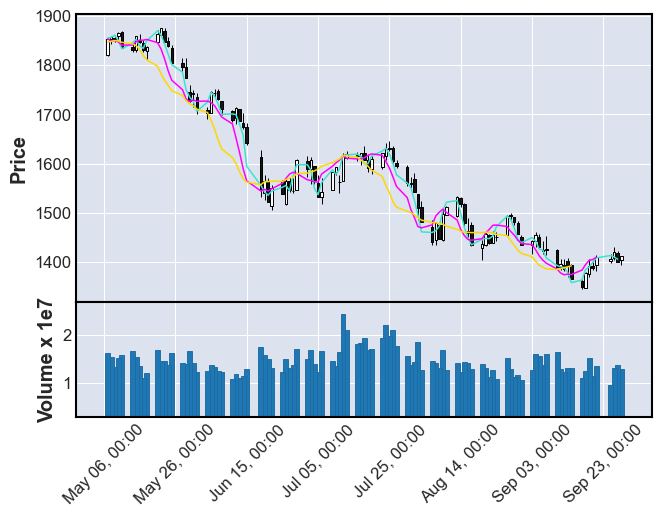

In [1]:
import pandas as pd
daily = pd.read_csv(r"C:\Users\86135\000002\k\创业板指数.csv",index_col=0,parse_dates=True)#index_col = 0表示第一列作为行索引    parse_dates = True,将索引变为时间序列
daily.index.name = 'Date'            
print(daily.shape)
print(daily.head(3))
print(daily.info())
import mplfinance as mpl
mpl.plot(daily,type = 'candle', mav = (2, 5, 10), volume=True, show_nontrading=True)
#mav = 均线, volume = 交易量, show_nontrading = 是否显示停盘

In [4]:
mpl.plot?

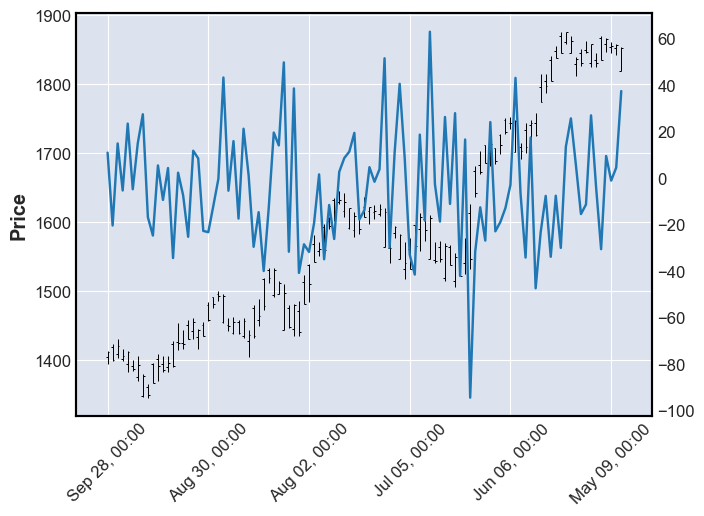

In [17]:
#make_addplot可以接受一个pandas、numpy、array以及list格式的数据（tuple不可以），传递给make_addplot的数据参数必须与将来画图传递给plot的数据参数行数相同
add_plot = mpl.make_addplot(daily['price_change'])#就是加上其他的列
mpl.plot(daily, addplot=add_plot)
plt.show()

In [5]:
mpl.make_addplot?

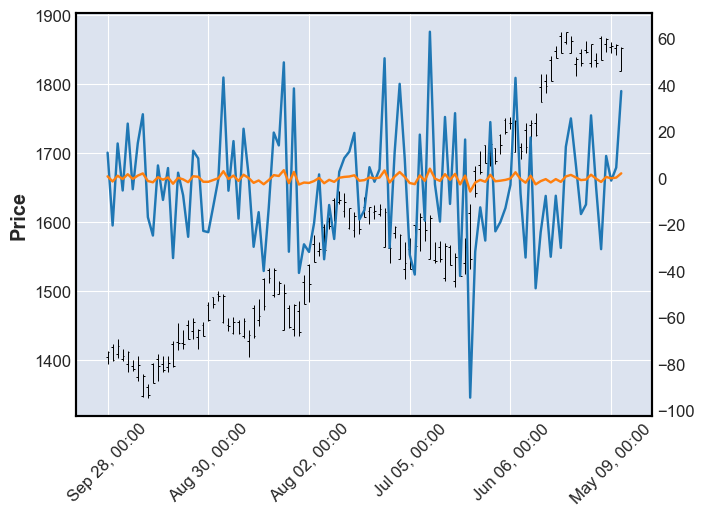

In [20]:
add_plot = mpl.make_addplot(daily[['price_change', 'p_change']])#就是加上其他的列,多个列时用列表
mpl.plot(daily, addplot=add_plot)
plt.show()

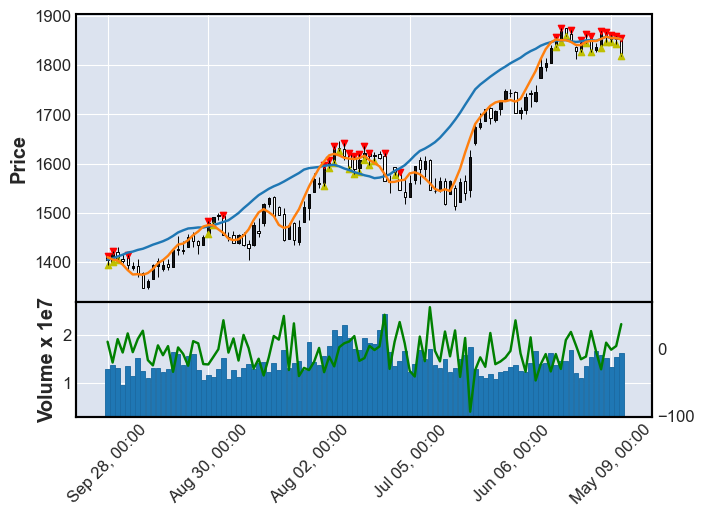

In [44]:
def daily_analyze(daily: pd.DataFrame):
    if daily.shape[0] == 0:
        daily = daily
    s_list = []
    b_list = []
    b=-1
    for i, v in daily['high'].iteritems():
        if v > daily['ma20'][i] and (b == -1 or b == 1):
            b_list.append(daily['low'][i])
            b = 0
        else:
            b_list.append(np.nan)  # 这里添加nan的目的是，对齐主图的k线数量
        if daily['low'][i] < daily['ma5'][i] and (b == -1 or b == 0):
            s_list.append(v)
            b = 1
        else:
            s_list.append(np.nan)
    return b_list, s_list

b_list, s_list = daily_analyze(daily)
add_plot = [
    mpl.make_addplot(b_list, scatter=True, markersize=20, marker='^', color='y'),
    mpl.make_addplot(s_list, scatter=True, markersize=20, marker='v', color='r'),
    mpl.make_addplot(daily[['ma20', 'ma5']]),
    mpl.make_addplot(daily['price_change'], panel='lower', color='g', secondary_y='auto')]#在附图中添加折线图
mpl.plot(daily, type='candle', addplot=add_plot, volume=True)
plt.show()  # 显示

In [6]:
#旧版的mpf.make_addplot的关键字参数panel='lower’是在附图中绘制，新版改为：panel=1；默认是panel=0的，也就是说主图面板为0，附图为1，既然可以为1那么就可能有2、3、…、9，明显是新版可以绘制多个附图了！最多绘制9个附图。
#与上面的更新对应，既然可以绘制1、2、3…多个附图，那么在plot时就应该可以设置附图的比例，所有，plot中增加了参数：panel_ratios=(1, 1)来设置主图和附图的比例，第一个参数数主图，往后依次是附图，r如果有两个附图，比如：panel_ratios=(1, 1，0.5)。默认情况下主图高度是附图 的2.5倍。
#在绘图plot函数中使用关键字参数style='sas’可以把主图Y左边放到右边，默认是‘default’，设置线型是参数linestyle，直接上代码吧，都是常用的参数：
def daily_analyze(daily: pd.DataFrame):
    if daily.shape[0] == 0:
        daily = daily
    s_list = []
    b_list = []
    b=-1
    for i, v in daily['high'].iteritems():
        if v > daily['ma20'][i] and (b == -1 or b == 1):
            b_list.append(daily['low'][i])
            b = 0
        else:
            b_list.append(np.nan)  # 这里添加nan的目的是，对齐主图的k线数量
        if daily['low'][i] < daily['ma5'][i] and (b == -1 or b == 0):
            s_list.append(v)
            b = 1
        else:
            s_list.append(np.nan)
    return b_list, s_list

b_list, s_list = daily_analyze(daily)
add_plot = [
    mpl.make_addplot(b_list, scatter=True, markersize=20, marker='^', color='y'),
    mpl.make_addplot(s_list, scatter=True, markersize=20, marker='v', color='r'),
    mpl.make_addplot(daily[['ma20', 'ma5']]),
    mpl.make_addplot(daily['price_change'], panel='lower', color='g', secondary_y='auto')]#在附图中添加折线图
    mpf.make_addplot(daily['Adj Close'], color='b', linestyle='dotted', secondary_y=True)]
mpl.plot(daily, type='candle', addplot=add_plot, volume=True)
plt.show()  # 显示

IndentationError: unexpected indent (<ipython-input-6-85a0a927e745>, line 29)